# Lab Assignment 9: House Price Prediction using Linear Regression

## Objective:      

### Implement Linear Regression to predict house prices using various features, and evaluate the model using RMSE and R² score.
Dataset:
    California Housing Dataset (from scikit-learn)
Libraries:
    pandas, numpy, matplotlib, seaborn, scikit-learn


### Linear Regression – Theory

Linear Regression is a supervised learning algorithm used for predicting a **continuous target variable** based on one or more input features.

**Simple Linear Regression Equation:**
y = β₀ + β₁x + ε

**Multiple Linear Regression:**
y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

Where:
- y → Target variable (House Price)
- x → Feature(s) (like number of rooms, area, etc.)
- β₀ → Intercept (bias)
- β₁...βₙ → Coefficients (weights)
- ε → Error term

We use metrics like:
- **RMSE (Root Mean Squared Error)** → Measures average prediction error.
- **R² Score** → Shows how much variance in target is explained by model.


In [7]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# 1. Load the Dataset

from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # Convert to pandas DataFrame

# Display first few rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# 2. Explore the Dataset

# Basic info and summary
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

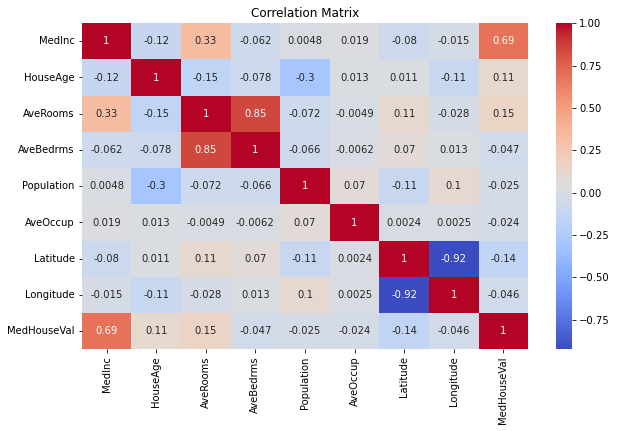

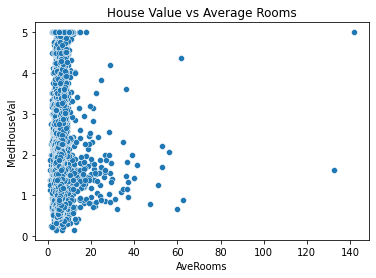

In [10]:
# 3. Visualize the Data

# Correlation matrix to identify relationships
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot between house value and average rooms
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df)
plt.title("House Value vs Average Rooms")
plt.show()


In [11]:
# 4. Feature Selection and Preprocessing

# Features (X) and Target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#5. Apply Linear Regression

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [13]:
#6.  Evaluate the Model

# Compute RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Intercept (β₀):", model.intercept_)
print("Coefficients (β₁...βₙ):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nModel Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Intercept (β₀): -37.023277706064135
Coefficients (β₁...βₙ):
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337

Model Performance:
Root Mean Squared Error (RMSE): 0.7456
R² Score: 0.5758


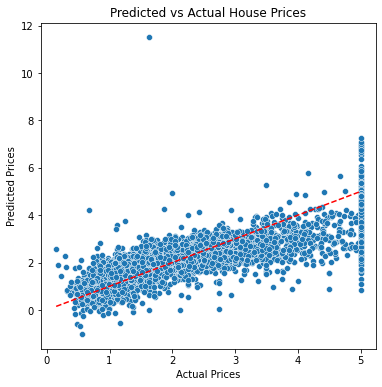

In [14]:
# 7. Visualize Predicted vs Actual Prices

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

#  Interpretation  of Results

### Model Interpretation

- **Intercept (β₀):** Base predicted value when all features are zero.
- **Coefficients (β₁...βₙ):** Change in predicted price for one-unit increase in a feature, keeping others constant.
- **RMSE:** Lower RMSE indicates better accuracy.
- **R² Score:** Indicates how well the model explains the data.
  - R² = 1 → Perfect fit
  - R² = 0 → Model is no better than predicting the mean